<a href="https://colab.research.google.com/github/wicsmart/Presentation/blob/main/time_series_A1A2A3A4A5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
# tendencia - direção
# sazonalidade - recorrência das oscilações
# resíduo -  o que sobra do sinal

In [ ]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [ ]:
df = pd.read_csv(df_path, parse_dates=[0], index_col='DATE')

df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
#df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

In [ ]:
#df.drop("DATE", inplace=True, axis=1)

In [ ]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df.loc['2001-03-01']

Value    92.8283
Name: 2001-03-01 00:00:00, dtype: float64

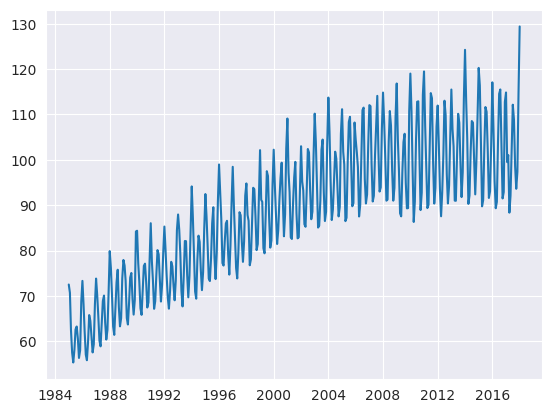

In [ ]:
plt.plot(df.index, df.Value)

In [ ]:
resultados = seasonal_decompose(df)

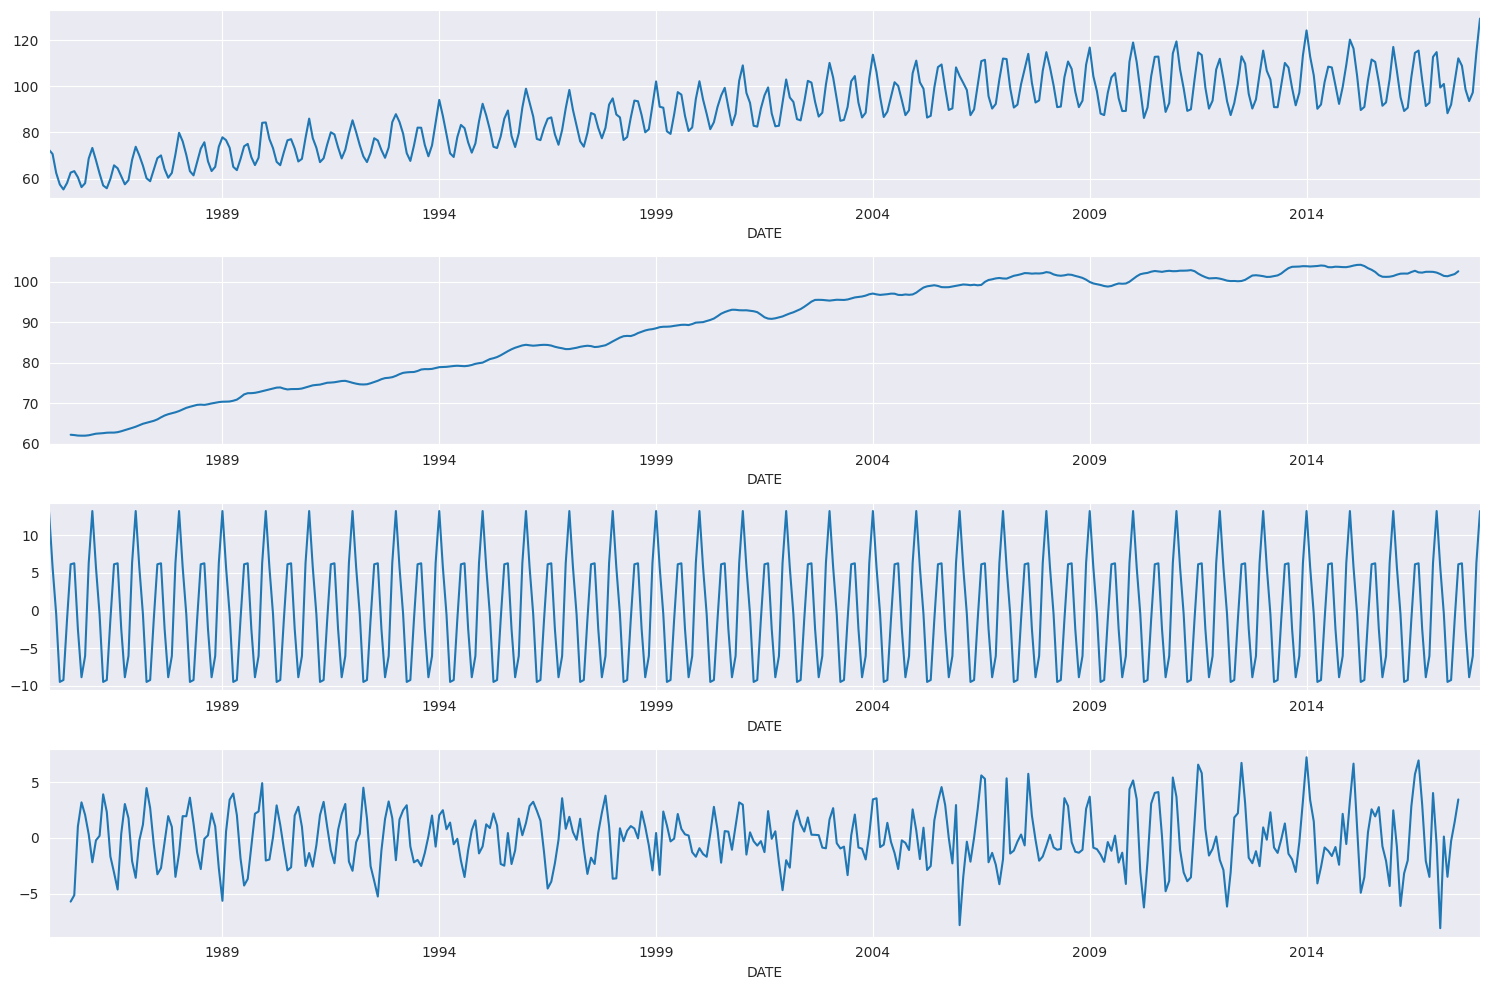

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [ ]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
sns.set_style('darkgrid')

In [ ]:
X = df.Value.values

In [ ]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.256990350047235
P-Value: 0.1862146911658712
Valores críticos:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


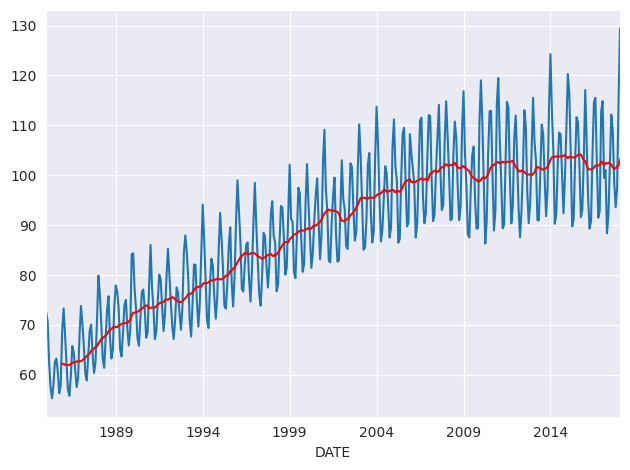

In [ ]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

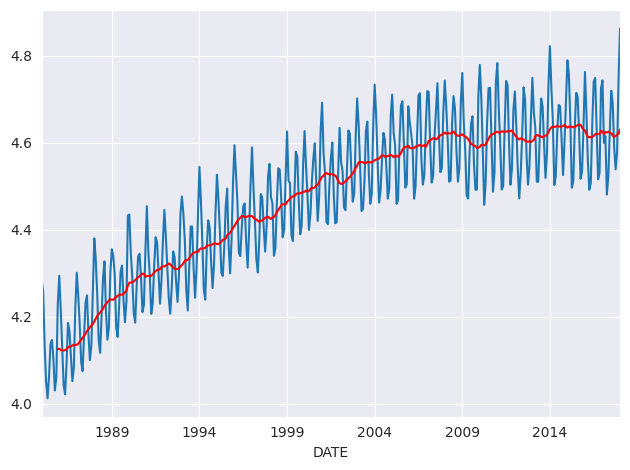

In [ ]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

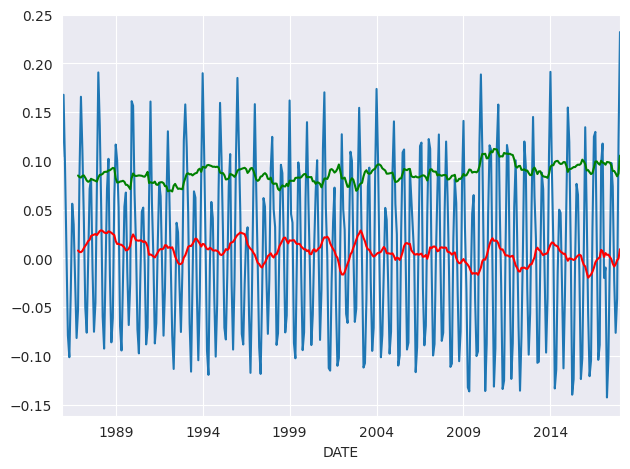

In [ ]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


In [ ]:
X_s = df_s.Value.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")


Teste ADF
Teste Estatístico: -5.2115861853654355
P-Value: 8.32563975994627e-06
Valores críticos:
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


Teste ADF
Teste Estatístico: -7.651129568145172
P-Value: 1.788126735435739e-11
Valores críticos:
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


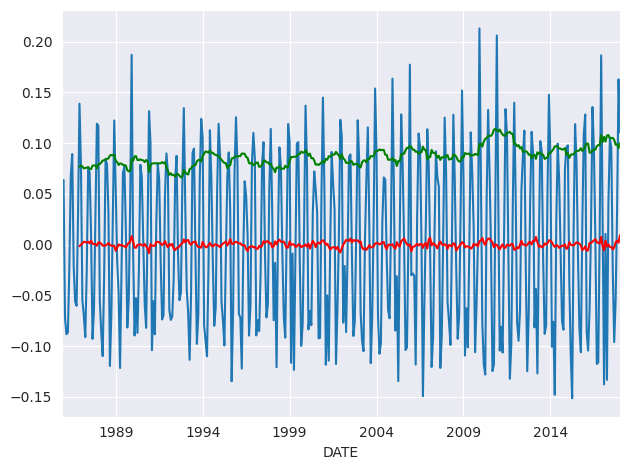

In [ ]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.Value.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [ ]:
#ARIMA - (AR): Autoregressivo, I: Integrado, MA:Moving Average

# A(x,y,z) -> ACF, PACF

In [ ]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [ ]:
#5% ACF

# 1.96/sqrt(N-d) -> N - número de pojntos do df e d é o número de vezes que nós diferenciamos o df

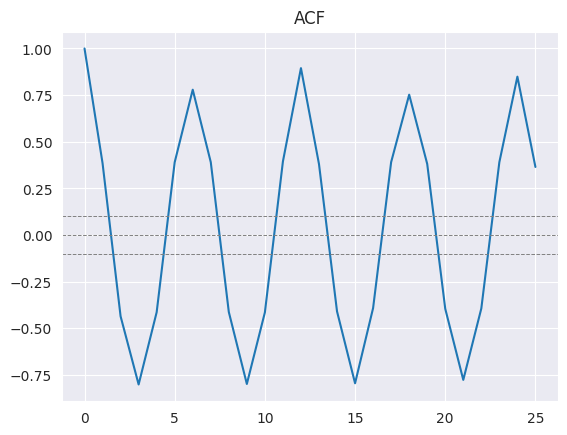

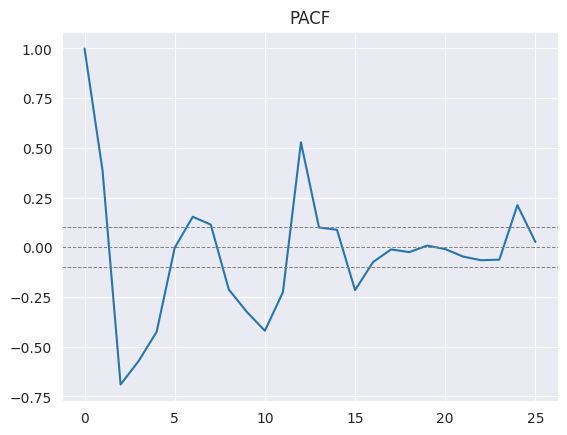

In [ ]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

In [ ]:
#A(x,y,z)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


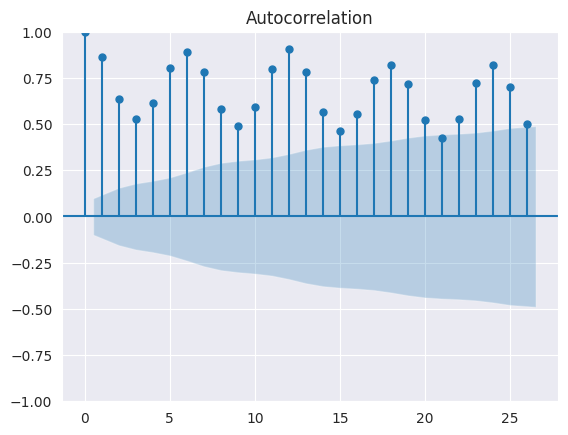

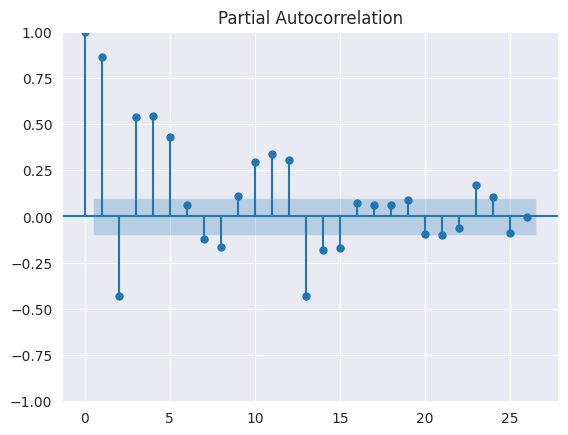

In [ ]:
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()

In [ ]:
df_novo = pd.read_csv('/content/train.csv', index_col='id', parse_dates=['date'])

In [ ]:
df_novo

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [ ]:
df_novo['store_nbr'].nunique()

54

In [ ]:
df_1 = df_novo.loc[df_novo['store_nbr'] == 1, ['date', 'family', 'sales']]
df_1 = df_1.rename(columns={'date':'ds','sales':'y','family':'unique_id'})

In [ ]:
df_1

,ds,unique_id,y
id,,,
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,0.000000
3,2013-01-01,BEVERAGES,0.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
2999134,2017-08-15,POULTRY,234.892000
2999135,2017-08-15,PREPARED FOODS,42.822998
2999136,2017-08-15,PRODUCE,2240.230000


In [ ]:
treino = df_1.loc[df_1['ds'] < '2014-01-01']
valid = df_1.loc[(df_1['ds'] >= '2014-01-01') & (df_1['ds'] < '2014-04-01')]
h = valid['ds'].nunique()

In [ ]:
h

90

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [ ]:
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

WMAPE: 57.50%


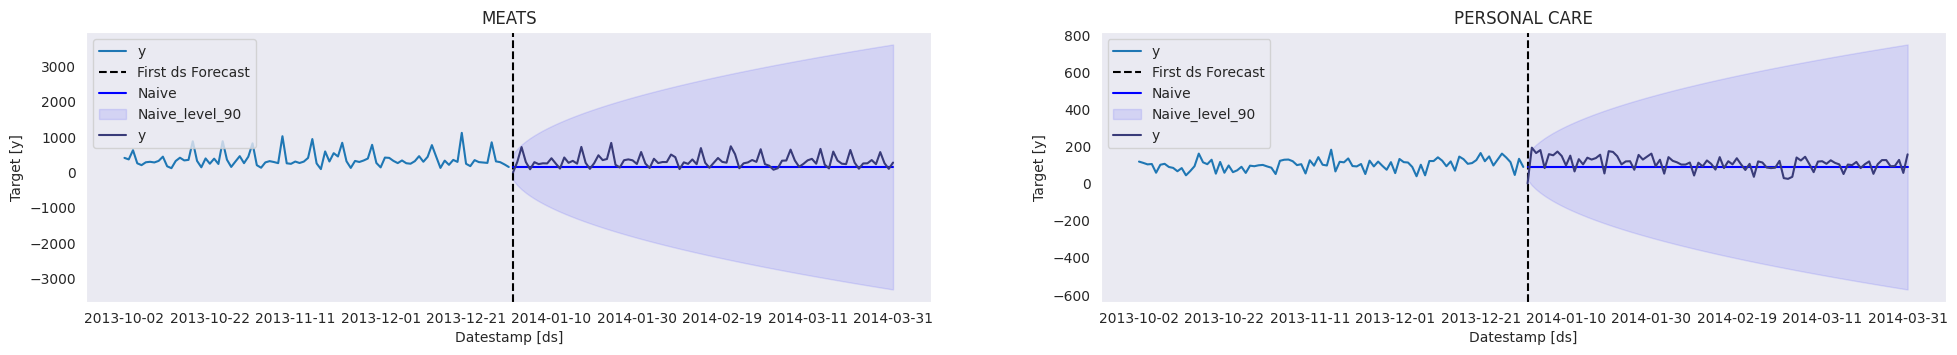

In [ ]:

model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)


In [ ]:
forecast_df

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,AUTOMOTIVE,2014-01-01,2.000,-2.671534,6.671534,0.0000
1,AUTOMOTIVE,2014-01-02,2.000,-4.606546,8.606546,3.0000
2,AUTOMOTIVE,2014-01-03,2.000,-6.091333,10.091333,0.0000
3,AUTOMOTIVE,2014-01-04,2.000,-7.343067,11.343067,0.0000
4,AUTOMOTIVE,2014-01-05,2.000,-8.445867,12.445867,1.0000
...,...,...,...,...,...,...
2965,SEAFOOD,2014-03-27,13.933,-181.675537,209.541534,31.3880
2966,SEAFOOD,2014-03-28,13.933,-182.809509,210.675507,63.2869
2967,SEAFOOD,2014-03-29,13.933,-183.936981,211.802979,33.6150
2968,SEAFOOD,2014-03-30,13.933,-185.058060,212.924072,18.3520


WMAPE: 50.91%


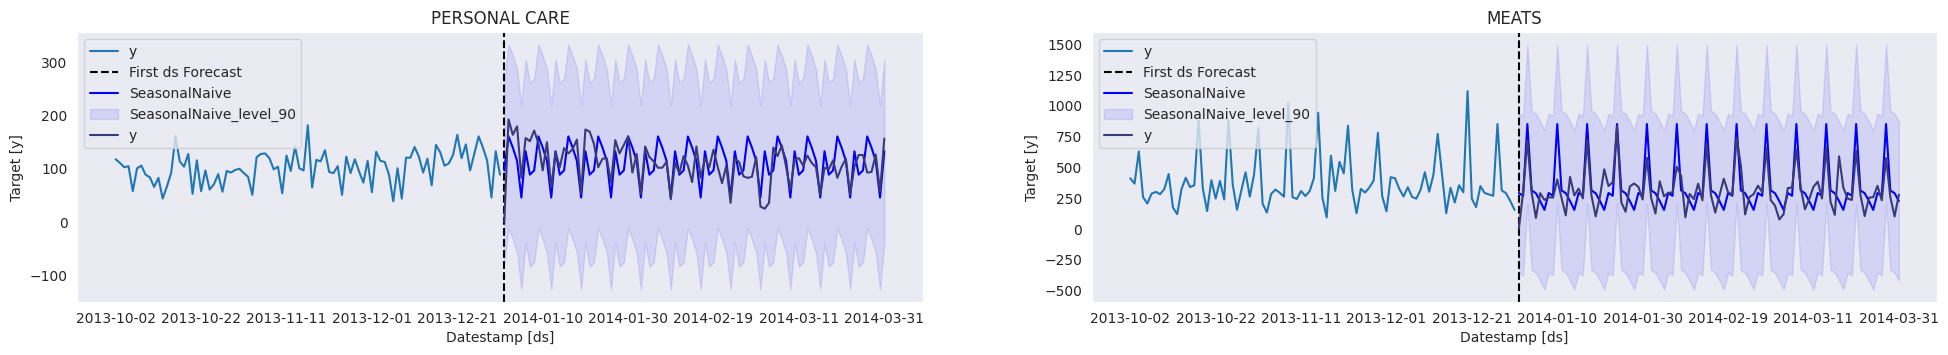

In [ ]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

In [ ]:
forecast_dfs

,unique_id,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,y
0,AUTOMOTIVE,2014-01-01,1.000000,-15.373032,17.373032,0.0000
1,AUTOMOTIVE,2014-01-02,2.000000,-14.373032,18.373032,3.0000
2,AUTOMOTIVE,2014-01-03,6.000000,-10.373032,22.373032,0.0000
3,AUTOMOTIVE,2014-01-04,4.000000,-12.373032,20.373032,0.0000
4,AUTOMOTIVE,2014-01-05,0.000000,-16.373032,16.373032,1.0000
...,...,...,...,...,...,...
2965,SEAFOOD,2014-03-27,26.622999,-30.028112,83.274109,31.3880
2966,SEAFOOD,2014-03-28,22.541000,-34.110111,79.192108,63.2869
2967,SEAFOOD,2014-03-29,19.537001,-37.114109,76.188110,33.6150
2968,SEAFOOD,2014-03-30,7.108000,-49.543110,63.759109,18.3520


WMAPE: 53.02%


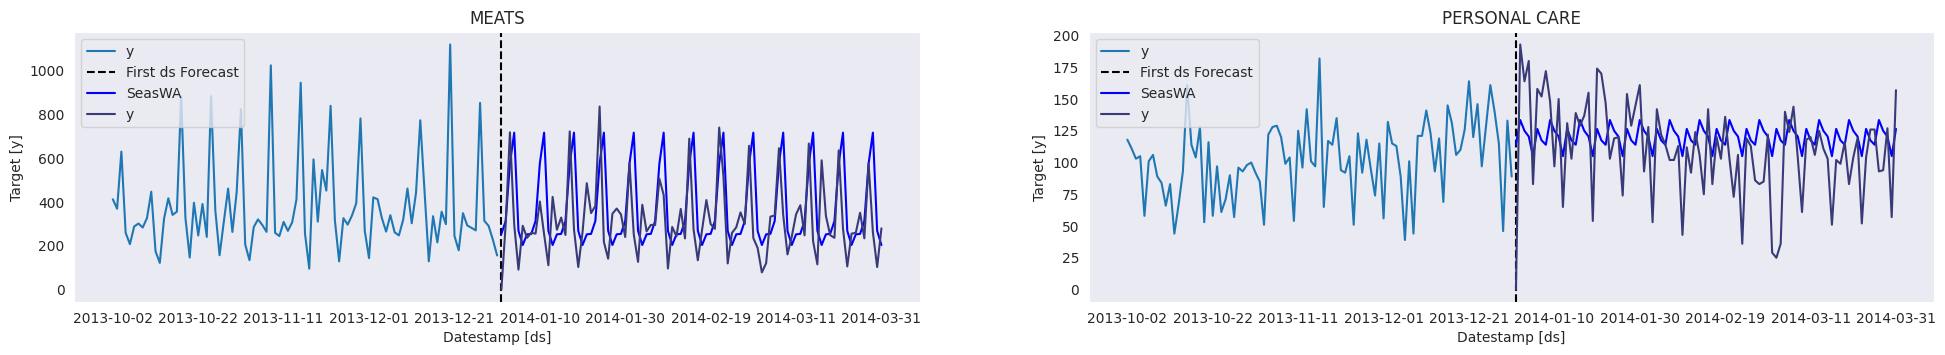

In [ ]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h, level=[90])
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

WMAPE: 51.94%


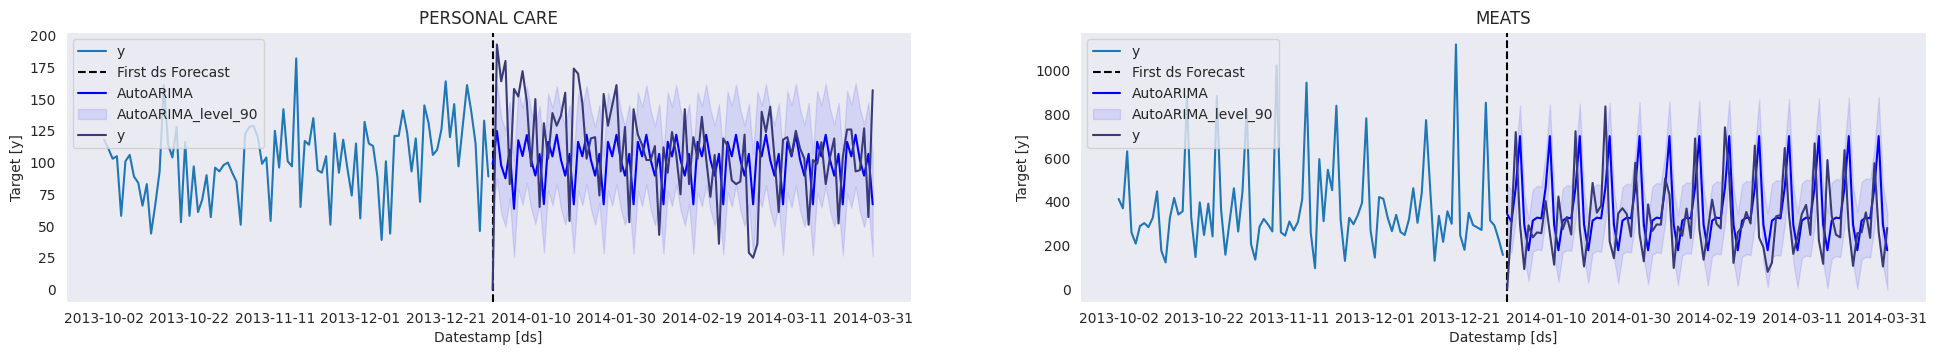

In [ ]:
#ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I - quantidade que a série foi diferenciada/ MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)

In [ ]:
model_a = StatsForecast(models=[Naive(),AutoARIMA(season_length=7), SeasonalNaive()], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)